In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from pyspec import spectrum as spec
import scipy.integrate as integ

In [2]:
#https://stackoverflow.com/questions/65184952/integration-offset-with-cumtrapz-python-scipy

In [3]:
def trap_cumulative(E,k,direction=1):
    
    dk=np.diff(k[::direction])[0]
    EE=[]
    for ii in range(E.shape[0]-1):
        EE.append(((E[ii] + E[ii+1])*0.5)*dk)

    Ec=np.cumsum(np.array(EE));
    return Ec

### Foward Integral

In [4]:
x=np.linspace(-100,100,50)

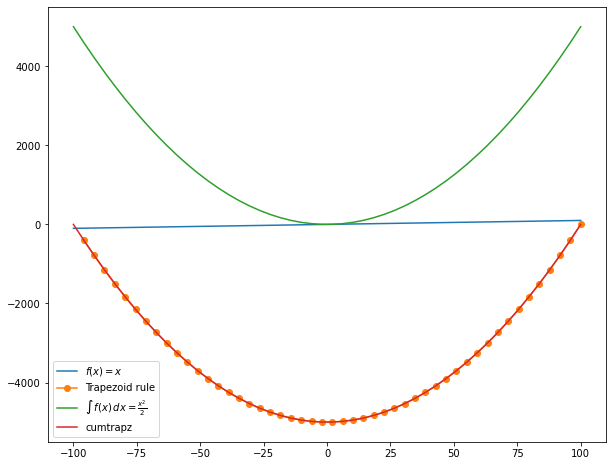

In [9]:
xtrap_f=trap_cumulative(E=x,k=x,direction=1)
'Forward Integral'
plt.figure(figsize=(10,8))
plt.plot(x,x,label=r'$f(x)=x$')
plt.plot(x[1:],xtrap_f,label=r'Trapezoid rule',marker='o')
plt.plot(x, 0.5*(x**2),label=r'$\int \,f(x)\,dx= \frac{x^2}{2}$')
plt.plot(x, integ.cumtrapz(y=x,x=x,initial=0),label=r'cumtrapz')



plt.legend()

### Backward Integral

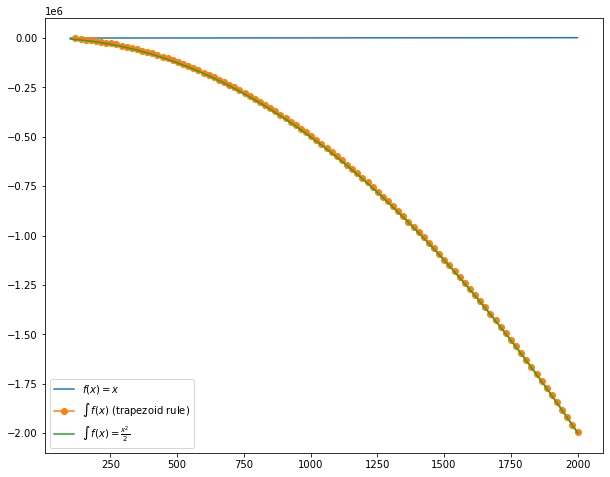

In [475]:
xtrap_b=trap_cumulative(x,x,direction=-1)

'Backward Integral'
plt.figure(figsize=(10,8))
plt.plot(x,x,label=r'$f(x)=x$')
plt.plot(x[1:],xtrap_b,label=r'$\int \,f(x)$ (trapezoid rule)',marker='o')
plt.plot(x,-(0.5*(x**2)),label=r'$\int \,f(x)= \frac{x^2}{2}$')
# plt.ylim(0,200)
plt.legend()

### Total Integral (Forward)

In [476]:
trapz(x,dx=np.diff(x)[0])

1995000.0000000005

In [477]:
xtrap_f[-1]

1995000.0000000005

In [478]:
(x**2/2)[-1] - (x**2/2)[0]

1995000.0

### Total Integral (Backwards)

In [479]:
trapz(x,dx=np.diff(x[::-1])[0])

-1995000.000000021

In [480]:
xtrap_b[-1]

-1995000.0000000203

## Test 2 - Using $\sin(x)$

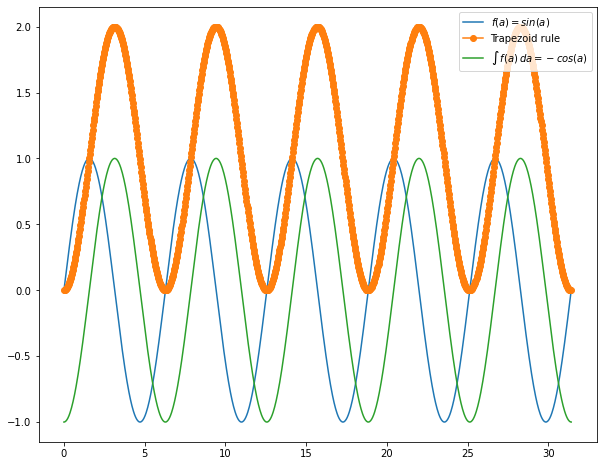

In [22]:
a=np.linspace(0,10*np.pi,1000)
asig=np.sin(a)

atrap=trap_cumulative(E=asig,k=a,direction=1)
atrap = atrap-atrap[0]

'Forward Integral'
plt.figure(figsize=(10,8))
plt.plot(a,asig,label=r'$f(a)=sin(a)$')
plt.plot((a[1:] + a[:-1])/2,atrap,label=r'Trapezoid rule',marker='o')
plt.plot(a,-np.cos(a),label=r'$\int \,f(a)\, da= - cos(a)$')

# plt.ylim(0,100)
plt.legend()

In [440]:
trapz(asig,dx=np.diff(a)[0])

2.220446049250313e-16

In [441]:
(np.diff(a)[0])*((asig[0] + asig[1])/2 + np.sum(asig[1:-1]))

0.0004943871671890203

In [442]:
np.sum(asig)*np.diff(a)[0]

-2.2344703090345587e-16

In [443]:
-np.cos(a)[-1] + np.cos(a)[0]

0.0

In [444]:
atrap[-1] - atrap[0]

-0.0004943871671877211